In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0, asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=0, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, IP,downstream_YAG, crystal1,crystal2,crystal3,crystal4, slit,crl1,crl2]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 360.00034418370416 microns
FWHM in y: 360.00034418370416 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414876966694455
5.414876966694455
b 1.00
b 1.64
b 0.61
b 1.00
0.6102211874545929
19.86913187055027
19.869131870550262
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69
after c2: 0.00
after c3: 0.69
after c4: 0.00
(array([-0.23281791,  0.        ,  0.0332055 ]), array([0.023807  , 0.        , 0.99971657]))
1.3620401788281523e-05


In [4]:
print(crystal2.alpha)

0.43404492398595806


In [5]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.2595306524099044
0.03060251960041145
0.3467890417726059


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: -9.15
zx: 134.13
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.21
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: -3.71
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: 12.30
zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
dr

<IPython.core.display.Javascript object>


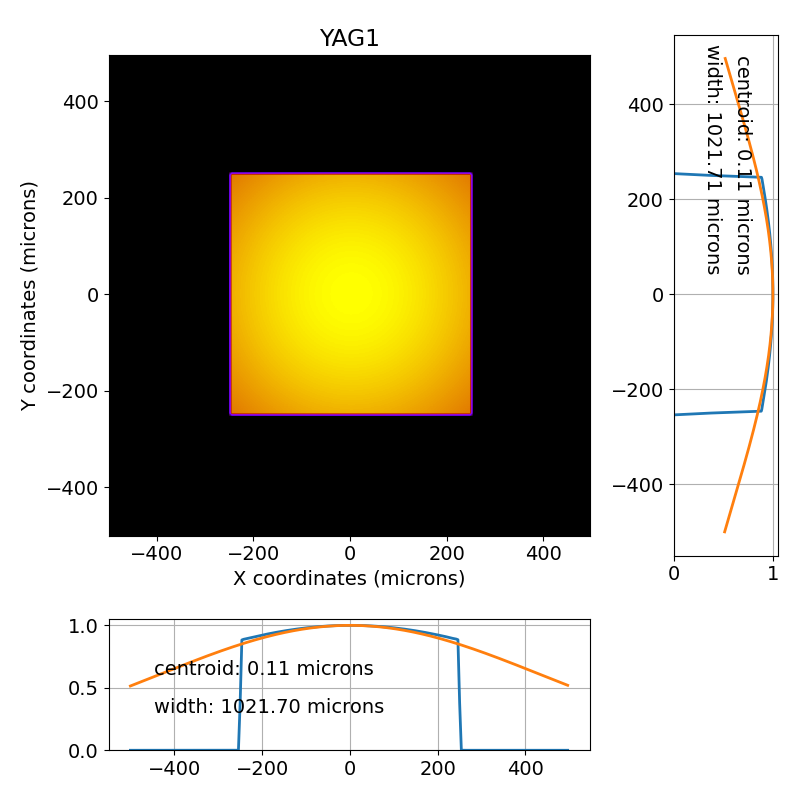

<IPython.core.display.Javascript object>


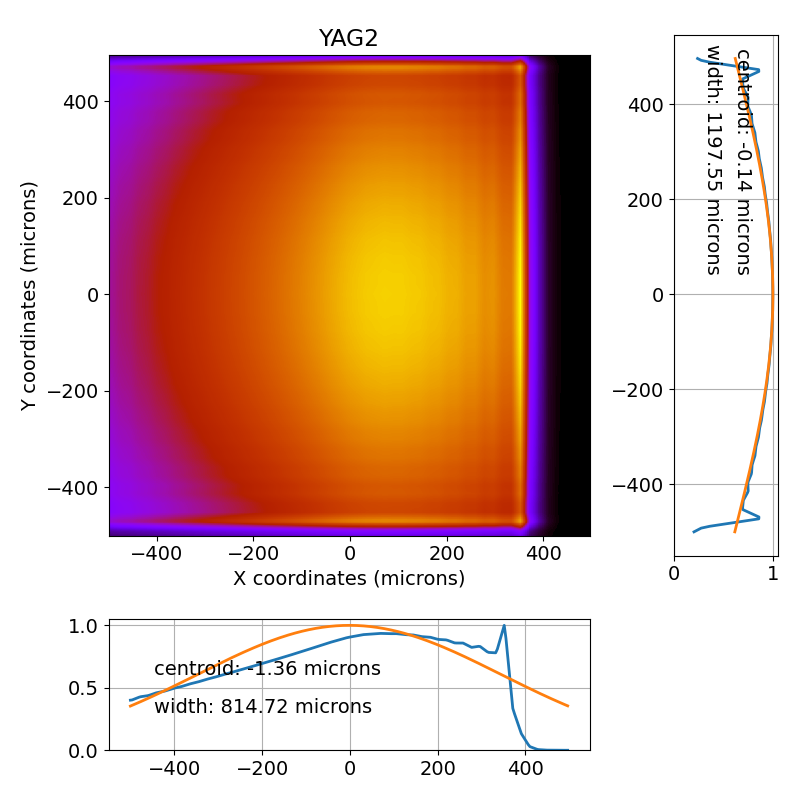

<IPython.core.display.Javascript object>


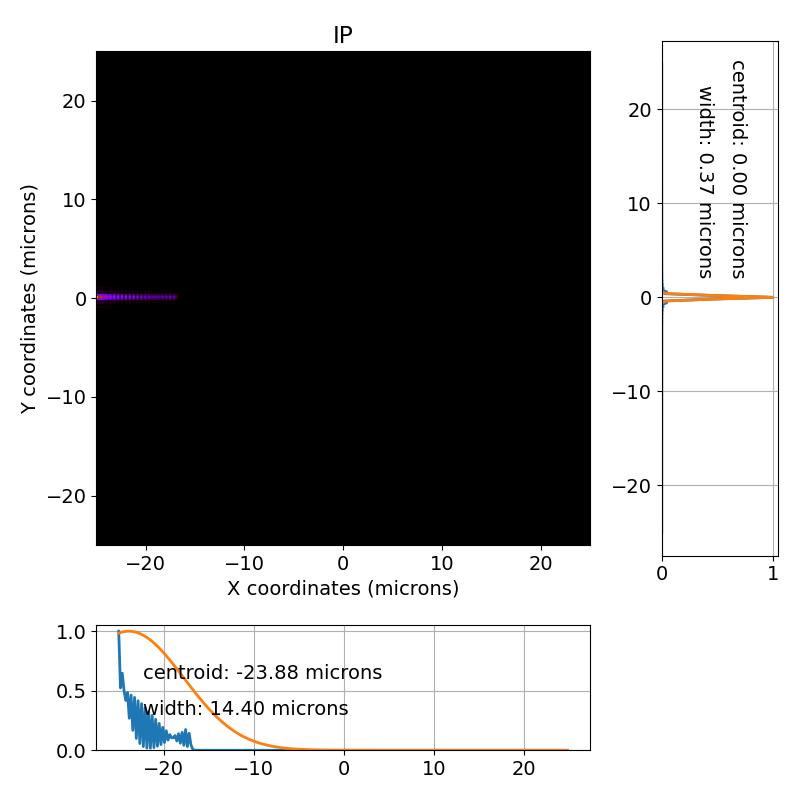

<IPython.core.display.Javascript object>


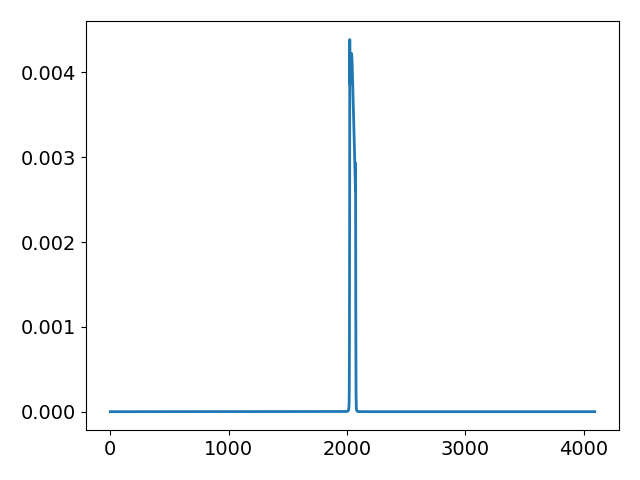

In [6]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [7]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=20, time_window=500, SASE=True, num_spikes=10)
print(pulse_test.N)

562


<IPython.core.display.Javascript object>


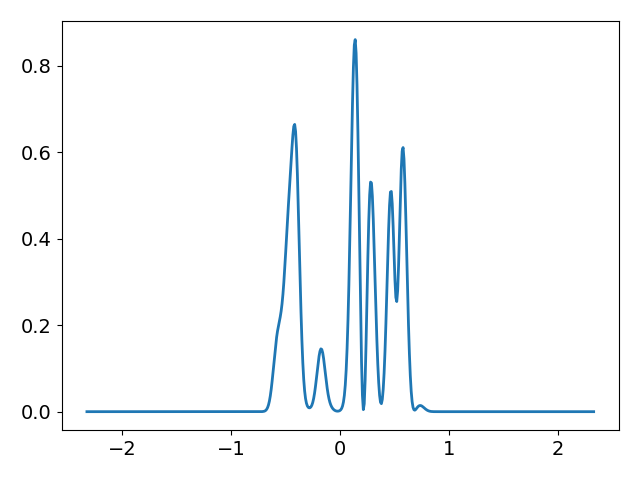

<IPython.core.display.Javascript object>


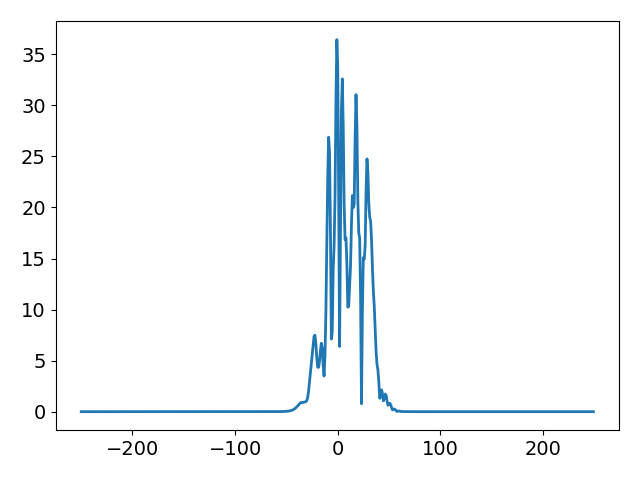

In [8]:
plt.figure()
plt.plot(pulse_test.energy-9500,np.abs(pulse_test.envelope)**2)
plt.figure()
plt.plot(pulse_test.t_axis,np.abs(pulse_test.pulse))

In [9]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG2','IP'])

FWHM in x: 360.05044239255193 microns
FWHM in y: 360.05044239255193 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414121703468495
5.414121703468495
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.00
zy: 360.02
azimuth -0.05 mrad
drift6
delta z: -12.13
zx: 134.10
zy: 360.12
azimuth -0.05 mrad
c3
zx: 360.10
zy: 360.12
azimuth 693.64 mrad
drift7
delta z: -4.91
zx: 360.11
zy: 360.13
azimuth 693.64 mrad
c4
zx: 360.11
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: 16.30

/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2922: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2923: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2930: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2936: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2958: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2972: RuntimeWarning: 

FWHM in x: 360.05012894214804 microns
FWHM in y: 360.05012894214804 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4141264282823265
5.4141264282823265
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.00
zy: 360.02
azimuth -0.05 mrad
drift6
delta z: 0.08
zx: 134.10
zy: 360.12
azimuth -0.05 mrad
c3
zx: 360.10
zy: 360.12
azimuth 693.64 mrad
drift7
delta z: 0.03
zx: 360.11
zy: 360.13
azimuth 693.64 mrad
c4
zx: 360.11
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: -0.10


zx: 360.15
zy: 360.16
azimuth -0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.05 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.05 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.05 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
FWHM in x: 360.0479348046577 microns
FWHM in y: 360.0479348046577 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414159501979155
5.414159501979155
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
m

zx: 0.00
zy: 0.00
azimuth -0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.05 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
FWHM in x: 360.0463675800251 microns
FWHM in y: 360.0463675800251 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414183126048318
5.414183126048318
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azim

zx: 360.15
zy: 360.16
azimuth -0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
FWHM in x: 360.0444869285413 microns
FWHM in y: 360.0444869285413 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414211474931313
5.414211474931313
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
m

Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
FWHM in x: 360.04260629677515 microns
FWHM in y: 360.04260629677515 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4142398238143095
5.4142398238143095
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.0

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.12
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.14
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.14
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.16
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9

Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
FWHM in x: 360.03853166225736 microns
FWHM in y: 360.03853166225736 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414301246394133
5.414301246394133
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00


zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.13
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.15
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.15
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.17
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second mome

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.13
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.15
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.15
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.18
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.14
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.15
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.15
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.18
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Us

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.14
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.16
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.16
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.18
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.0

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.15
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.16
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.16
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.19
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.0

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.15
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.17
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.17
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.19
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.0

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.16
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.17
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.17
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.20
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second mome

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.16
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.18
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.18
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.20
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data 

focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
FWHM in x: 360.0203536512953 microns
FWHM in y: 360.0203536512953 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414575285596421
5.414575285596421
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
en

zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.17
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.19
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.19
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.21
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
F

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.17
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.19
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.19
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.22
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second mome

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zx: 3.05
zy: 3.05
azimuth -0.03 mrad
FWHM in x: 360.01565274139125 microns
FWHM in y: 360.01565274139125 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414646157803911
5.414646157803911
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.18
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.19
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.19
zy: 360.13
azimut

zx: 3.05
zy: 3.05
azimuth -0.03 mrad
FWHM in x: 360.01345902560064 microns
FWHM in y: 360.01345902560064 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41467923150074
5.41467923150074
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.18
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.20
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.20
zy: 360.13
azimuth 

zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.0112653366414 microns
FWHM in y: 360.0112653366414 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414712305197567
5.414712305197567
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.19
zy: 360.12
azimuth 693.61

zx: 360.21
zy: 360.13
azimuth -0.03 mrad
drift8
delta z: -0.10
zx: 360.23
zy: 360.16
azimuth -0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.0090716745129 microns
FWHM in y: 360.0090716745129 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414745378894396
5.414745378894396
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 35

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.20
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.21
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.21
zy: 360.13
azimuth -0.03 mrad
drift8
delta z: -0.10
zx: 360.24
zy: 360.16
azimuth -0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.0068780392149 micr

zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.0049978017423 microns
FWHM in y: 360.0049978017423 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414806801474219
5.414806801474219
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad

zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.00280421627076 microns
FWHM in y: 360.00280421627076 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4148398751710465
5.4148398751710465
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx:

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.21
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.10
zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.00092402150585 microns
FWHM in y: 360.00092402150585 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.10
zx: 360.26
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05

zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99685033380064 microns
FWHM in y: 359.99685033380064 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4149296466338654
5.4149296466338654
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azim

zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9946568479769 microns
FWHM in y: 359.9946568479769 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414962720330694
5.414962720330694
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad

zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9924633889803 microns
FWHM in y: 359.9924633889803 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414995794027521
5.414995794027521
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad

zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99026995681044 microns
FWHM in y: 359.99026995681044 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41502886772435
5.41502886772435
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359

focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9880765514666 microns
FWHM in y: 359.9880765514666 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415061941421178
5.415061941421178
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.0

focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9858831729485 microns
FWHM in y: 359.9858831729485 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4150950151180055
5.4150950151180055
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360

zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.98368982125555 microns
FWHM in y: 359.98368982125555 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415128088814834
5.415128088814834
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mr

zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.98149649638714 microns
FWHM in y: 359.98149649638714 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415161162511663
5.415161162511663
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.03
zx: 360.27
zy: 360.13
azimuth 6

zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.9793031983429 microns
FWHM in y: 359.9793031983429 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415194236208491
5.415194236208491
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.28
zy: 360.13
azimuth 693

zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.10
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.97710992712246 microns
FWHM in y: 359.97710992712246 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415227309905319
5.415227309905319
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.0

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.10
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z

FWHM in x: 359.9736634122553 microns
FWHM in y: 359.9736634122553 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415279282857477
5.415279282857477
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.10
zx: 36

zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9717835229723 microns
FWHM in y: 359.9717835229723 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415307631740474
5.415307631740474
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.30
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.10
zx: 360.32
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04


zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.968023803524 microns
FWHM in y: 359.968023803524 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415364329506464
5.415364329506464
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05


zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.10
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.96583067024613 microns
FWHM in y: 359.96583067024613 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4153974032032925
5.4153974032032925
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
a

zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.34
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.

FWHM in x: 359.9617577796009 microns
FWHM in y: 359.9617577796009 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415458825783115
5.415458825783115
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.33
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx:

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.33
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.95486540615684 microns
FWHM in y: 359.95486540615684 microns
FWHM Divergence (

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx:

zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9507927645449 microns
FWHM in y: 359.9507927645449 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415624194267255
5.415624194267255
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx:

zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94859984198746 microns
FWHM in y: 359.94859984198746 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415657267964084
5.415657267964084
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.35
zy: 360.13
azimuth 693.5

zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9464069462469 microns
FWHM in y: 359.9464069462469 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415690341660912
5.415690341660912
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad


zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9445273426699 microns
FWHM in y: 359.9445273426699 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415718690543908
5.415718690543908
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 

zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9423344967307 microns
FWHM in y: 359.9423344967307 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415751764240737
5.415751764240737
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx:

zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94014167760685 microns
FWHM in y: 359.94014167760685 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415784837937565
5.415784837937565
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0

FWHM in x: 359.937948885298 microns
FWHM in y: 359.937948885298 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4158179116343925
5.4158179116343925
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.10
zx: 360

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.10
zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.0

zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.93387662786415 microns
FWHM in y: 359.93387662786415 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415879334214215
5.415879334214215
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.38
zy: 360.13
azimuth 693.5

zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9316839121665 microns
FWHM in y: 359.9316839121665 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415912407911044
5.415912407911044
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad


zx: 360.39
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.10
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.92949122328196 microns
FWHM in y: 359.92949122328196 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4159454816078725
5.4159454816078725
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00

delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.92761179700716 microns
FWHM in y: 359.92761179700716 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415973830490867
5.415973830490867
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.38
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.39
zy: 360.13

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.38
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.40
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.40
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.42
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

FWHM in x: 359.9235397743221 microns
FWHM in y: 359.9235397743221 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416035253070691
5.416035253070691
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.39
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.40
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.40
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360

FWHM in x: 359.92166041042543 microns
FWHM in y: 359.92166041042543 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416063601953687
5.416063601953687
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.39
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.41
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.41
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 3

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.40
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.41
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.41
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.44
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.91946784410834 microns
FWHM in y: 359.91946784410834 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416096675650515
5.4

zx: 360.40
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.41
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.41
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.44
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.9175885228897 microns
FWHM in y: 359.9175885228897 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4161250245335095
5.4161250245335095
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29


zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.40
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.42
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.42
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.45
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx:

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.41
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.42
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.42
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.45
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift1

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.41
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.43
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.43
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.45
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.0

zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.42
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.43
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.43
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.46
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.9097582298249 microns
FWHM in y: 359.9097582298249 microns
FWHM

zx: 360.42
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.44
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.44
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.46
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.9078790103707 microns
FWHM in y: 359.9078790103707 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (

zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.9059998106122 microns
FWHM in y: 359.9059998106122 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416299842645316
5.416299842645316
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.43
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.44
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.44
zy: 360.13
azimuth 0.0

delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.43
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.45
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.45
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.47
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mra

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.43
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.45
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.45
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.47
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift1

zx: 360.45
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.48
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
FWHM in x: 359.90067551825064 microns
FWHM in y: 359.90067551825064 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41638016448047
5.41638016448047
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta 

zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
FWHM in x: 359.8987963939884 microns
FWHM in y: 359.8987963939884 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416408513363465
5.416408513363465
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -

FWHM in x: 359.8969172894201 microns
FWHM in y: 359.8969172894201 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41643686224646
5.41643686224646
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.45
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.46
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.46
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.4

FWHM in x: 359.8947250256475 microns
FWHM in y: 359.8947250256475 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416469935943289
5.416469935943289
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.45
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.47
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.47
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.46
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.47
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.47
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.50
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second m

delta z: 0.03
zx: 360.48
zy: 360.13
azimuth 693.51 mrad
c4
zx: 360.48
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.50
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y becomes focused
x remains focused
y remains focused
x becomes unfocused
y remains focused
x stays unfocused
y remains focused
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift12
delta z: 0.00
x becomes focused
y becomes unfocused
x becomes unfocused
y stays

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.46
zy: 360.12
azimuth 693.51 mrad
drift7
delta z: 0.03
zx: 360.48
zy: 360.13
azimuth 693.51 mrad
c4
zx: 360.48
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.51
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data co

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.47
zy: 360.12
azimuth 693.51 mrad
drift7
delta z: 0.03
zx: 360.48
zy: 360.13
azimuth 693.51 mrad
c4
zx: 360.48
zy: 360.13
azimuth 0.07 mrad
drift8
delta z: -0.10
zx: 360.51
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.0

x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.88564307556544 microns
FWHM in y: 359.88564307556544 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4166069555444345
5.4166069555444345
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.47
zy: 360.12
azimuth 693.51 mrad
drift7
delta z: 

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.48
zy: 360.12
azimuth 693.51 mrad
drift7
delta z: 0.03
zx: 360.49
zy: 360.13
azimuth 693.51 mrad
c4
zx: 360.49
zy: 360.13
azimuth 0.07 mrad
drift8
delta z: -0.10
zx: 360.52
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data co

zx: 360.50
zy: 360.13
azimuth 693.51 mrad
c4
zx: 360.50
zy: 360.13
azimuth 0.07 mrad
drift8
delta z: -0.10
zx: 360.52
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
drift12
delta z: 0.00
x becomes unfocused
y remains focused
x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.88188516181816 micron

zx: 360.53
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
drift12
delta z: 0.00
x becomes unfocused
y remains focused
x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.8800062344814 microns
FWHM in y: 359.8800062344814 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4166920

zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.87812732683545 microns
FWHM in y: 359.87812732683545 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416720351076416
5.416720351076416
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.49
zy: 360.12
azimuth 693.50 mrad
drift7
delta z: 0.03
zx: 360.51
zy: 360.13
azimuth 693.50 mrad
c4
zx: 360.51
zy: 360.13
azimuth 0

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.12
zy: 360.02
azimuth 0.07 mrad
drift6
delta z: 0.08
zx: 134.22
zy: 360.12
azimuth 0.07 mrad
c3
zx: 360.49
zy: 360.12
azimuth 693.50 mrad
drift7
delta z: 0.03
zx: 360.51
zy: 360.13
azimuth 693.50 mrad
c4
zx: 360.51
zy: 360.13
azimuth 0.07 mrad
drift8
delta z: -0.10
zx: 360.54
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. U

<IPython.core.display.Javascript object>


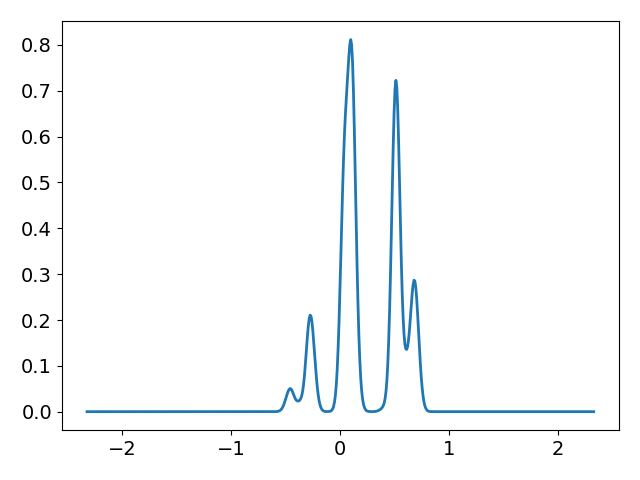

In [14]:
pulse_test.new_SASE()
plt.figure()
plt.plot(pulse_test.energy-9500,np.abs(pulse_test.envelope)**2)

In [17]:
x = pulse_test.x['IP']*1e6
Nx = np.size(x)
lineouts = np.zeros((Nx, 100))
energy = pulse_test.energy
Ne = np.size(energy)
spectra = np.zeros((Ne, 100))

for i in range(100):
    pulse_test.new_SASE()
    spectra[:,i] = np.abs(pulse_test.envelope)**2
    profile = np.sum(np.abs(pulse_test.time_stacks['IP'])**2, axis=2)
    lineouts[:,i] = np.sum(profile, axis=0)

In [78]:
np.savez('SASE_sim.npz', spectra=spectra, lineouts=lineouts)

<IPython.core.display.Javascript object>


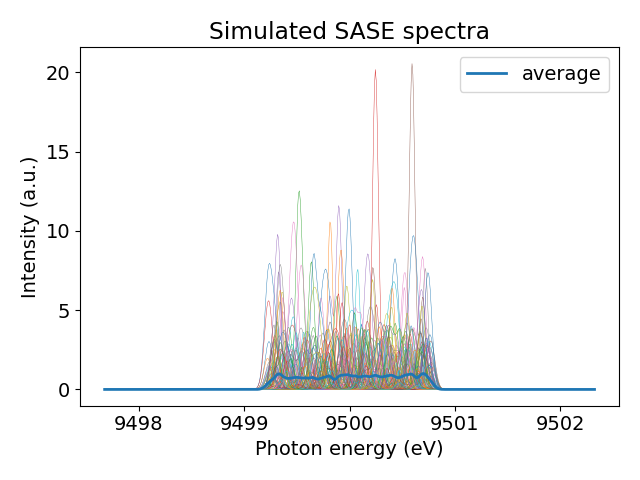

<IPython.core.display.Javascript object>


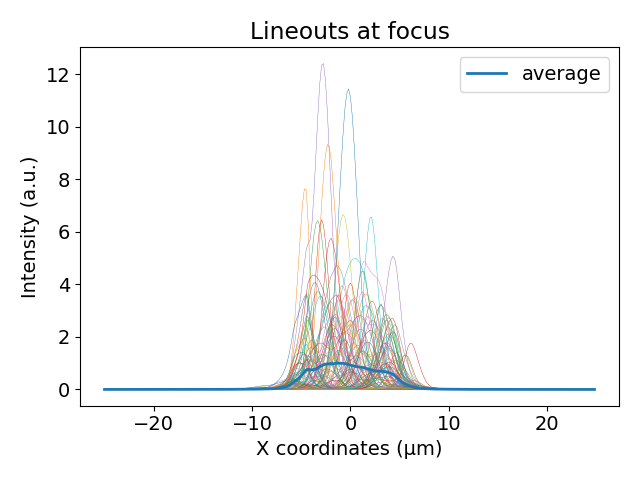

<IPython.core.display.Javascript object>


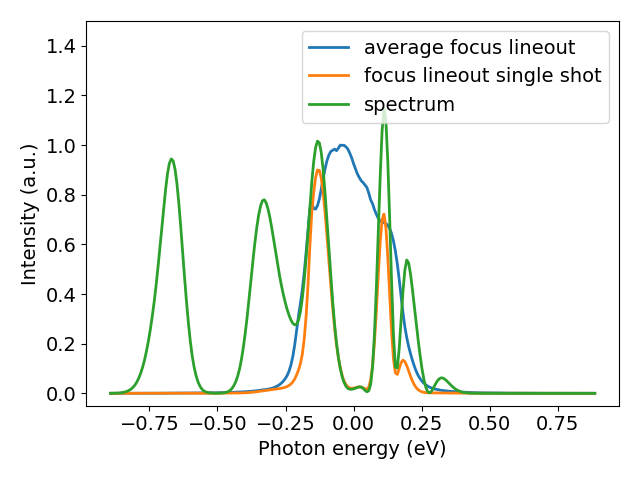

<IPython.core.display.Javascript object>


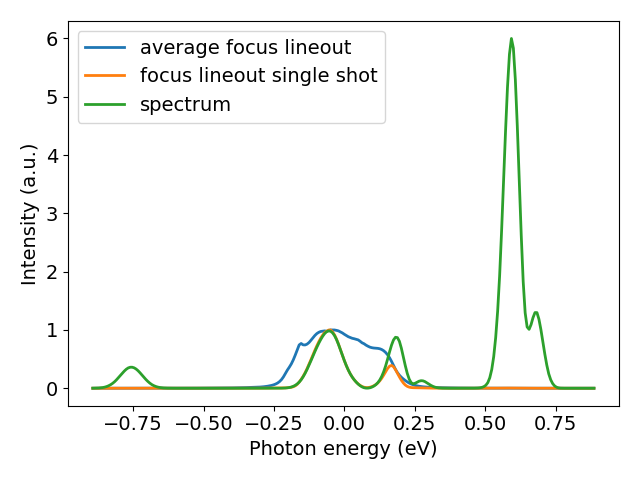

/Users/Matt/beamline/venv/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


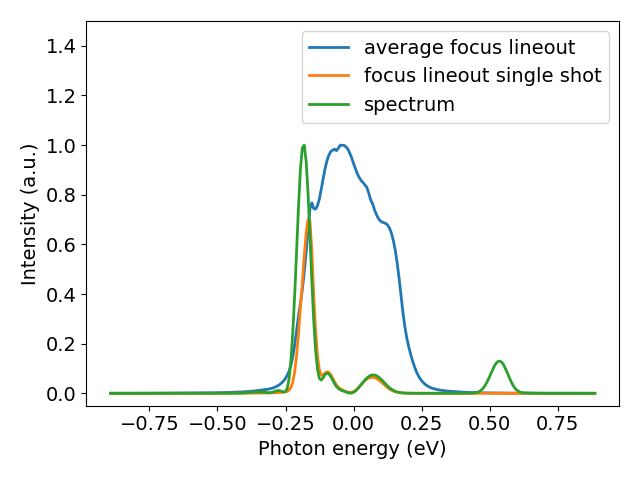

In [75]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'

plt.figure()
norm = np.max(np.mean(spectra, axis=1))
for i in range(100):
    plt.plot(pulse_test.energy, spectra[:,i]/norm, linewidth=.3)
plt.plot(pulse_test.energy, np.mean(spectra, axis=1)/norm, label='average')
plt.legend()
plt.xlabel('Photon energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.title('Simulated SASE spectra')
plt.savefig(figure_path+'spectra.png')

plt.figure()
x = pulse_test.x['IP']*1e6
norm = np.max(np.mean(lineouts, axis=1))
for i in range(100):
    plt.plot(x, lineouts[:,i]/norm, linewidth=.3)
plt.plot(x, np.mean(lineouts, axis=1)/norm, label='average')
plt.legend()
plt.xlabel(u'X coordinates (\u03BCm)')
plt.ylabel('Intensity (a.u.)')
plt.title('Lineouts at focus')
plt.savefig(figure_path+'simulated_lineouts.png')

conversion = 28.

index = 0

x = pulse_test.x['IP']*1e6
spectrum_interp = np.interp(x,(pulse_test.energy-pulse_test.E0)*conversion, spectra[:,0])
plt.figure()
plt.plot(x/conversion, np.mean(lineouts, axis=1)/norm, label='average focus lineout')
plt.plot(x/conversion, lineouts[:,0]/np.max(lineouts[:,0])*.9, label='focus lineout single shot')
plt.plot(x/conversion, spectrum_interp/np.max(spectrum_interp)*1.15,label='spectrum')

plt.xlabel('Photon energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.ylim(-.05,1.5)
plt.legend()
plt.savefig(figure_path+'SASE_sim1.png')

index = 15

x = pulse_test.x['IP']*1e6
spectrum_interp = np.interp(x,(pulse_test.energy-pulse_test.E0)*conversion, spectra[:,index])
plt.figure()
plt.plot(x/conversion, np.mean(lineouts, axis=1)/norm, label='average focus lineout')
plt.plot(x/conversion, lineouts[:,index]/np.max(lineouts[:,index]), label='focus lineout single shot')
plt.plot(x/conversion, spectrum_interp/np.max(spectrum_interp)*6,label='spectrum')

plt.xlabel('Photon energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.savefig(figure_path+'SASE_sim2.png')

index = 51

x = pulse_test.x['IP']*1e6
spectrum_interp = np.interp(x,(pulse_test.energy-pulse_test.E0)*conversion, spectra[:,index])
plt.figure()
plt.plot(x/conversion, np.mean(lineouts, axis=1)/norm, label='average focus lineout')
plt.plot(x/conversion, lineouts[:,index]/np.max(lineouts[:,index])*.7, label='focus lineout single shot')
plt.plot(x/conversion, spectrum_interp/np.max(spectrum_interp)*1,label='spectrum')

plt.xlabel('Photon energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.ylim(-.05, 1.5)
plt.legend()
plt.savefig(figure_path+'SASE_sim3.png')

<IPython.core.display.Javascript object>


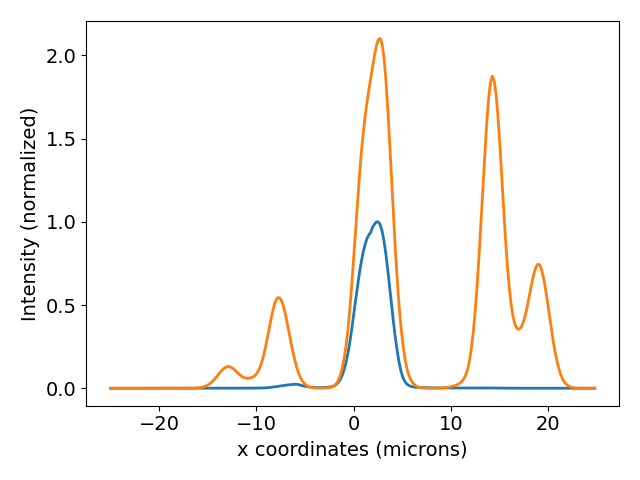

In [15]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'

conversion = 28.

x = pulse_test.x['IP']*1e6
spectrum_interp = np.interp(x,(pulse_test.energy-pulse_test.E0)*conversion, np.abs(pulse_test.envelope)**2)

ax, lineout = pulse_test.plot_1d_projection('IP')
lineout /= np.max(lineout)
mask = lineout>.01*np.max(lineout)

rocking_curve = lineout[mask]/spectrum_interp[mask]
rocking_curve /= np.max(rocking_curve)

ax.plot(x, spectrum_interp*2.6)
# plt.savefig(figure_path+'SASE3.png')
# ax.plot(x[mask], rocking_curve)

# ax.plot((pulse_test.energy-pulse_test.E0)*conversion, np.abs(pulse_test.envelope)**2)

<IPython.core.display.Javascript object>


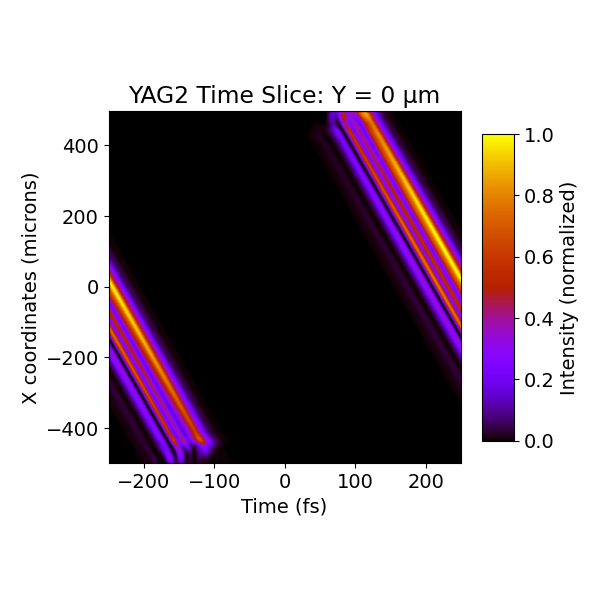

128


<IPython.core.display.Javascript object>


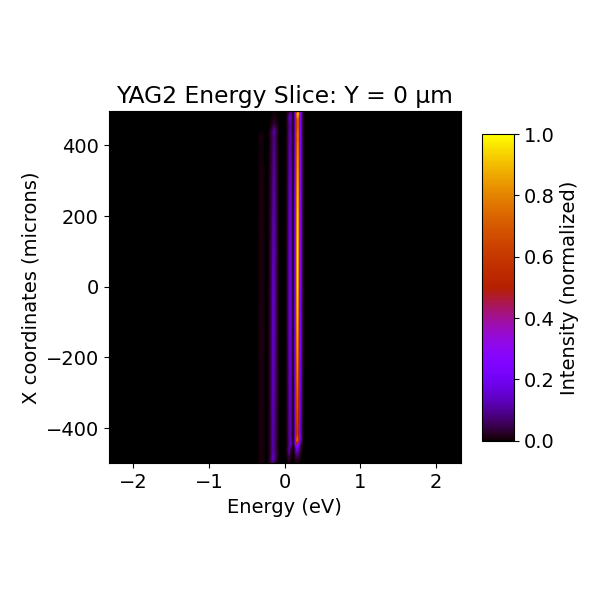

<IPython.core.display.Javascript object>


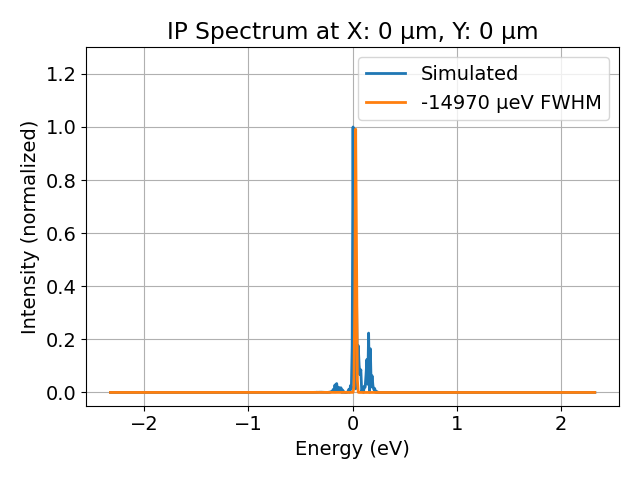

<IPython.core.display.Javascript object>


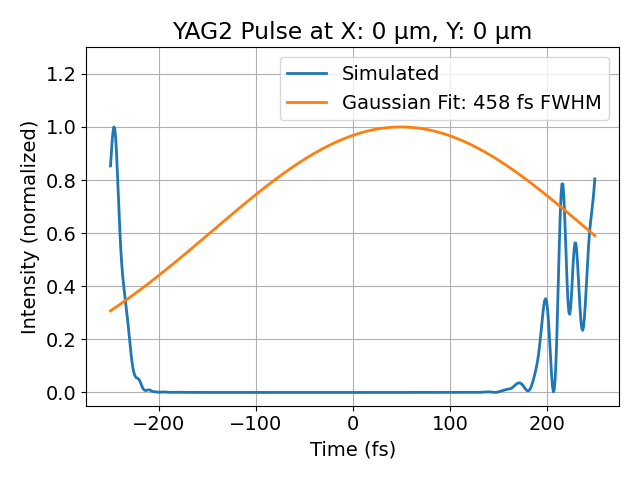

<IPython.core.display.Javascript object>


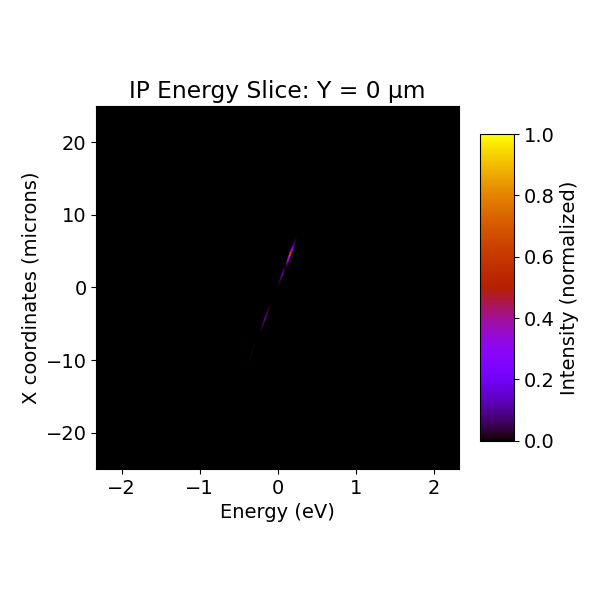

<IPython.core.display.Javascript object>


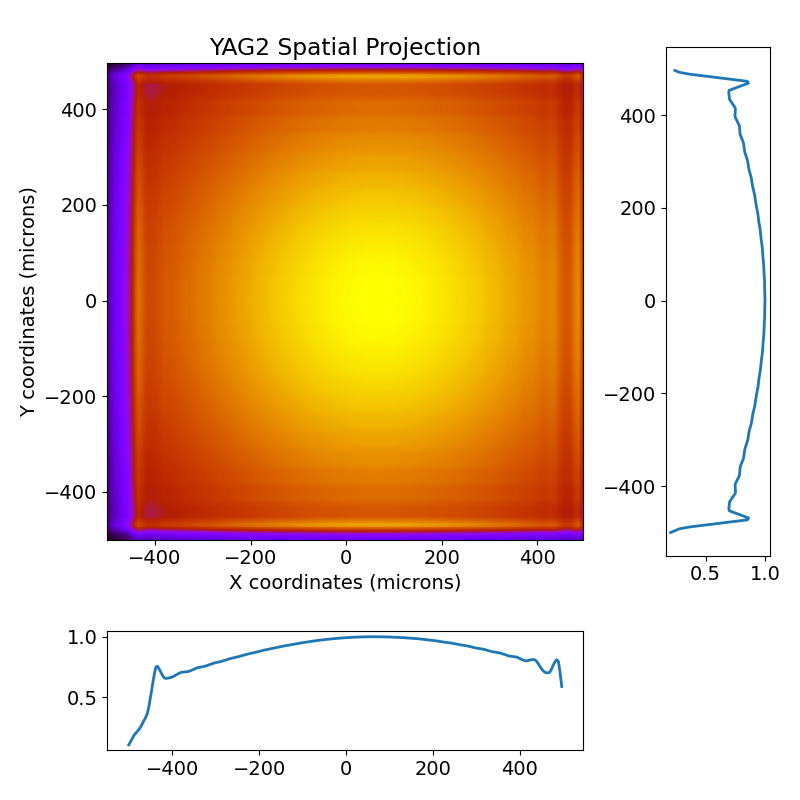

<IPython.core.display.Javascript object>


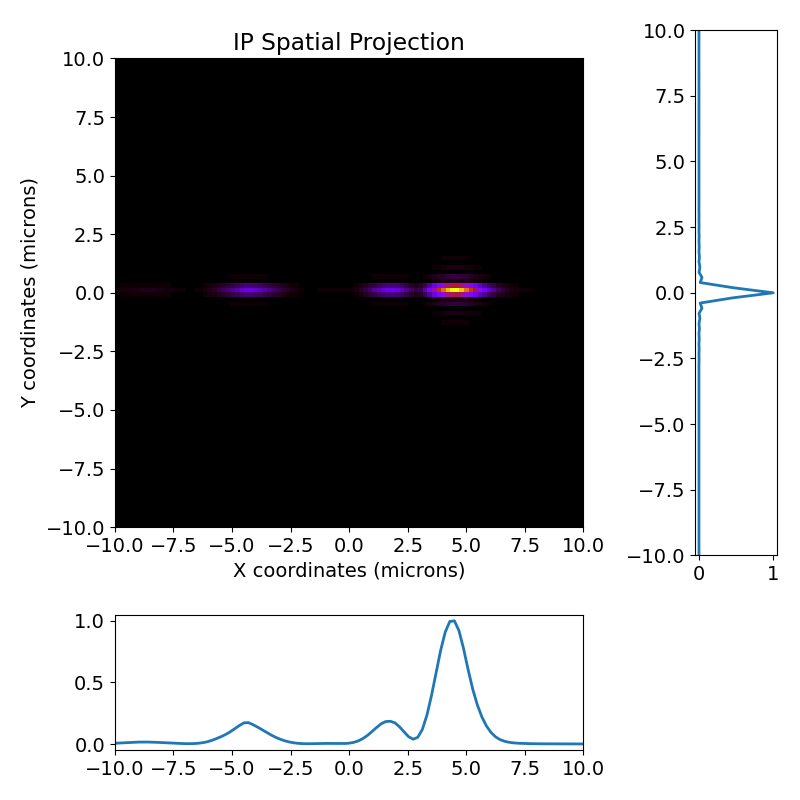

/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1253: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


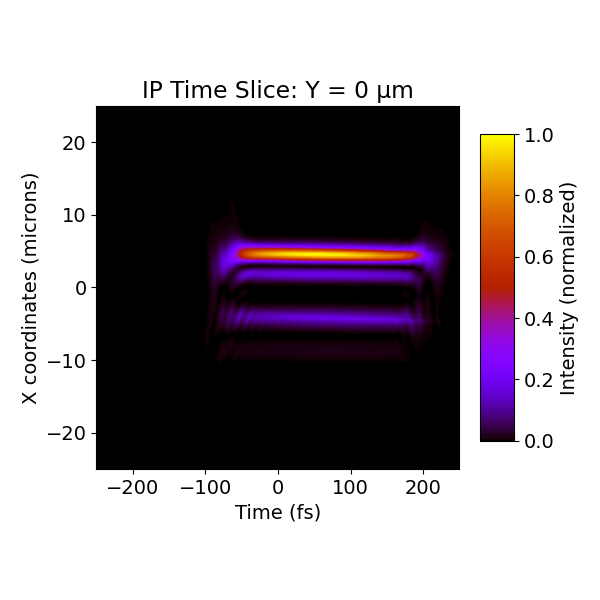

128


In [77]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('IP',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('YAG2')
ax_profile, ax2, ax3 = pulse_test.imshow_projection('IP')
ax_profile.set_xlim(-10,10)
ax_profile.set_ylim(-10,10)
ax2.set_xlim(-10,10)
ax3.set_ylim(-10,10)
plt.savefig(figure_path+'symmetric_focus_spatial.png')

pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


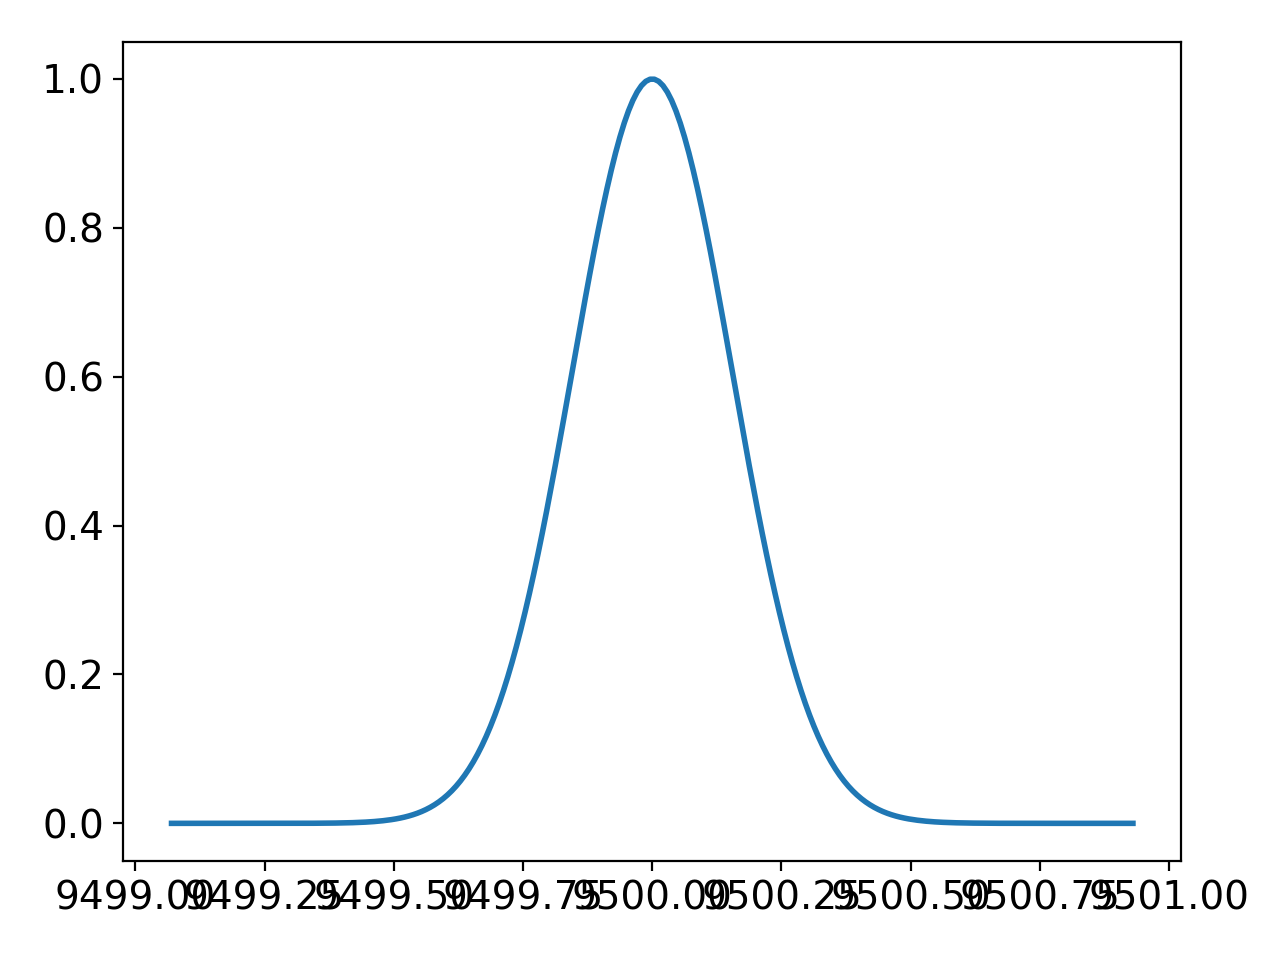

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8